# Data Manipulation Assignment
 _________________________________________________________________________________________________________________


## Students Performance in Exams
### Marks secured by the students in various subjects
 _________________________________________________________________________________________________________________

## 1- Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

## 2- Load Data 

In [12]:
df = pd.read_csv('StudentsPerformance.csv')

 _________________________________________________________________________________________________________________

## 3-  Describe data

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 _________________________________________________________________________________________________________________

## 4- Show Top 5 rows and Bottom 5 rows

In [14]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


 _________________________________________________________________________________________________________________

## 5- Data information  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Summary
 Dataset about student preformance in exam it have 1000 rows and 8 columns 
 
 columns [gender , race/ethnicity , parental level of education , lunch , test preparation course ] data type >>> object 
 
 columns [ math score , reading score , writing score] data type >>> integer
 
 _________________________________________________________________________________________________________________

## 6-  Replace value (none) to (Not completed) in column test preparation course

In [16]:
df['test preparation course'].value_counts(dropna=False)

none         642
completed    358
Name: test preparation course, dtype: int64

In [17]:
df["test preparation course"].replace({"none": "Not completed "}, inplace=True)
df["test preparation course"]

0      Not completed 
1           completed
2      Not completed 
3      Not completed 
4      Not completed 
            ...      
995         completed
996    Not completed 
997         completed
998         completed
999    Not completed 
Name: test preparation course, Length: 1000, dtype: object

### Summary
 Column test preparation course it have two values [none , completed] 
 
 none >> 642 rows     ,     Completed >> 358  
 
 Replace value none  to Not completed for become easy to understand for end-user
  _________________________________________________________________________________________________________________

#  7- Visualizations

## Plot 1 

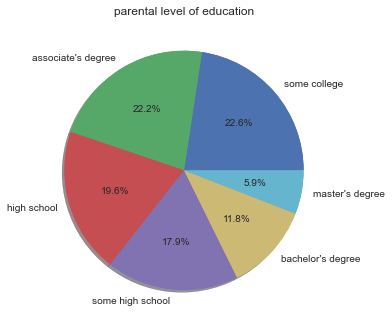

In [18]:
series = df["parental level of education"].value_counts() 

labels = series.index
values = series.values

plt.pie(values) 
plt.title("parental level of education")
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%')

plt.show()


 ### Summary plot 1 >> pie chart
 This plot show column (parental level of education) 
 
 The column have 7 values (some college, associate's degree, high school, some high school, bechelore's degree, master's degree) 
 The order of values sort form bigset presentge to small 
 
    _________________________________________________________________________________________________________________

##   Plot 2

In [19]:
df2 = df.groupby(["gender", "parental level of education"])\
.count()["math score"]\
.unstack("parental level of education")\
#.reset_index( )
df2.head()

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
gender,,,,,,
female,116,63,94,36,118,91
male,106,55,102,23,108,88


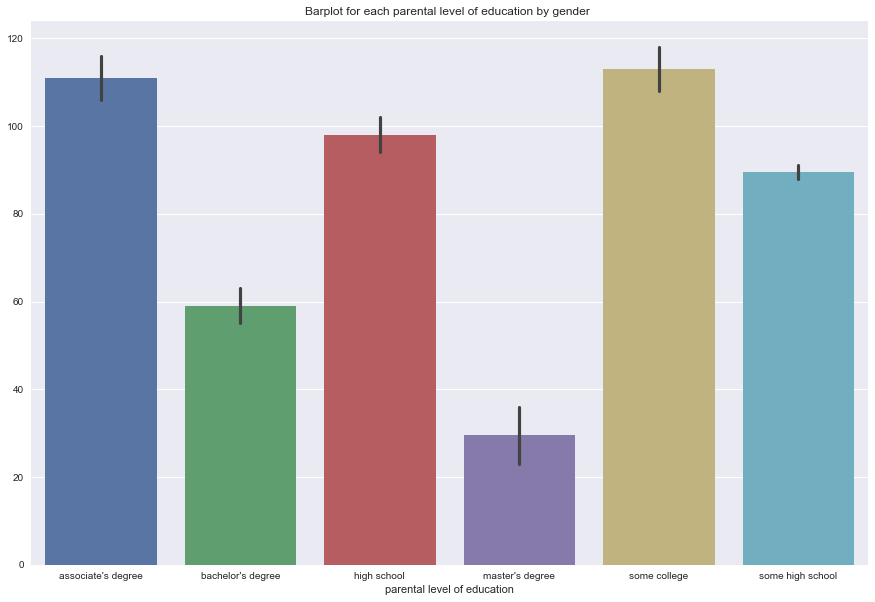

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(data=df2)
plt.title("Barplot for each parental level of education by gender ");

### Summary plot 2 >> Bar plot
This plot showed each parental level of education by gender of students of count math score

some college --> count of math score of female is 118 and male is 108

associate's degree --> count of math score of female is 116 and male is 106

high school --> count of math score of male is 102 and female is 94 

some some high school --> count of math score of female is 91 and male is 88

bachelor's degree --> count of math score of female is 63 and male is 55

master's degree --> count of math score of female is 36 and male is 23

(((((((((((((( just in high school male have higher math score than female)))))))))))))))))
_________________________________________________________________________________________________________________

##   Plot 3

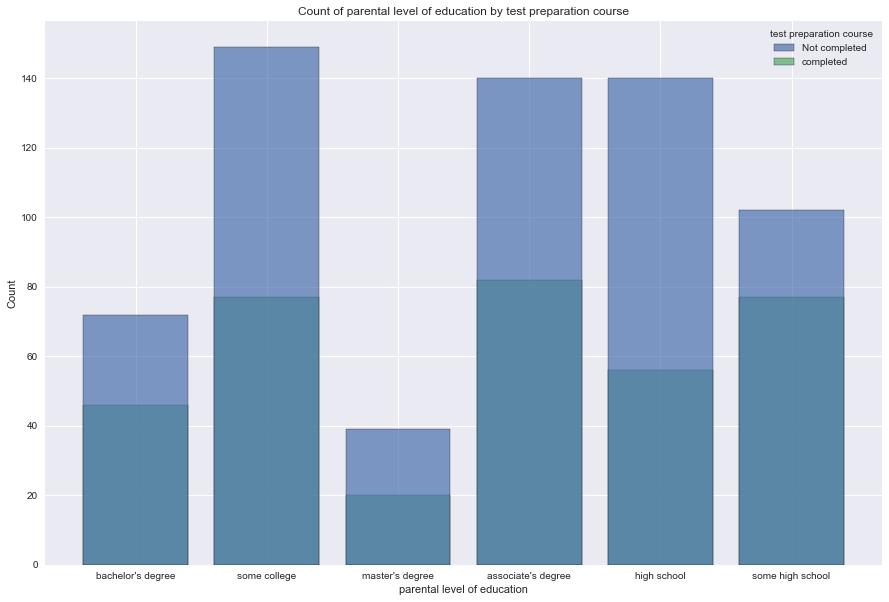

In [21]:
plt.figure(figsize=(15,10))
sns.histplot(df,
    x="parental level of education",       
    hue="test preparation course",
    alpha=0.7,
    shrink=.8
)
plt.title("Count of parental level of education by test preparation course");

 ### Summay plot 3 >> Histegram Plot 
 Count of parental level of education by test preparation course
 
 To find out how many students have completed test preparation course and not Completed for each parental level of education
 
 _________________________________________________________________________________________________________________

## 10-  Plot 4

In [22]:
df4 = df.groupby(["lunch", "test preparation course"])\
.count()["gender"]\
.unstack("test preparation course")\
#.reset_index( )
df4.head()

test preparation course,Not completed,completed
lunch,,
free/reduced,224,131
standard,418,227


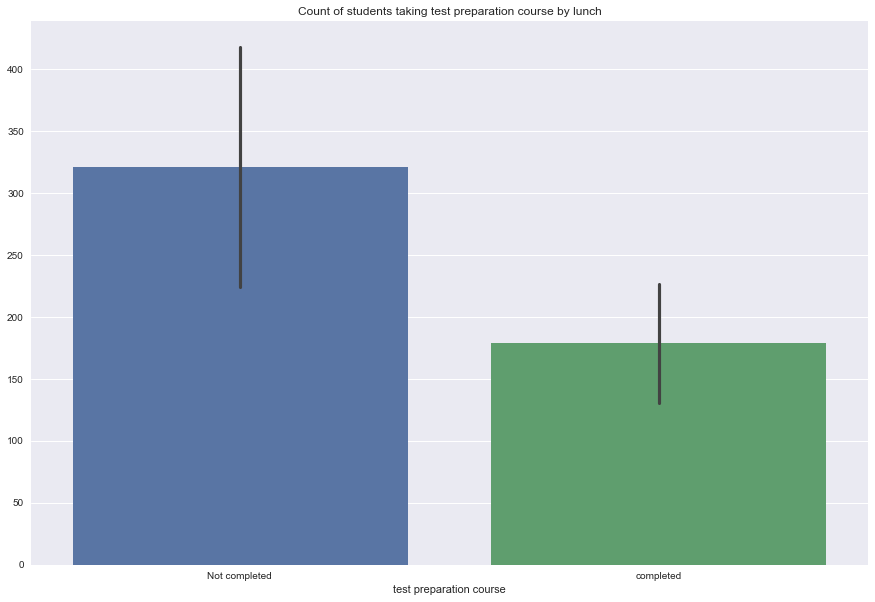

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(data=df4)
plt.title("Count of students taking test preparation course by lunch");

 ### Summay plot 4 >> Bar Plot 

Count of students taking test preparation course by lunch

test preparation course have 2 values Completed and Not Comploted 

Completed --> Students that have 131  free/reduced lunch and student that have 227 standard lunch  

Not Completed --> Students that have 224 free/reduced lunch and student that have 418 standard lunch  

____________________________________________________________________________________________________________________________

## Plot 5

In [24]:
df3 = df.groupby(["race/ethnicity", "parental level of education"])\
.count()["gender"]\
.unstack("parental level of education")\
#.reset_index( )

df3.head()

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


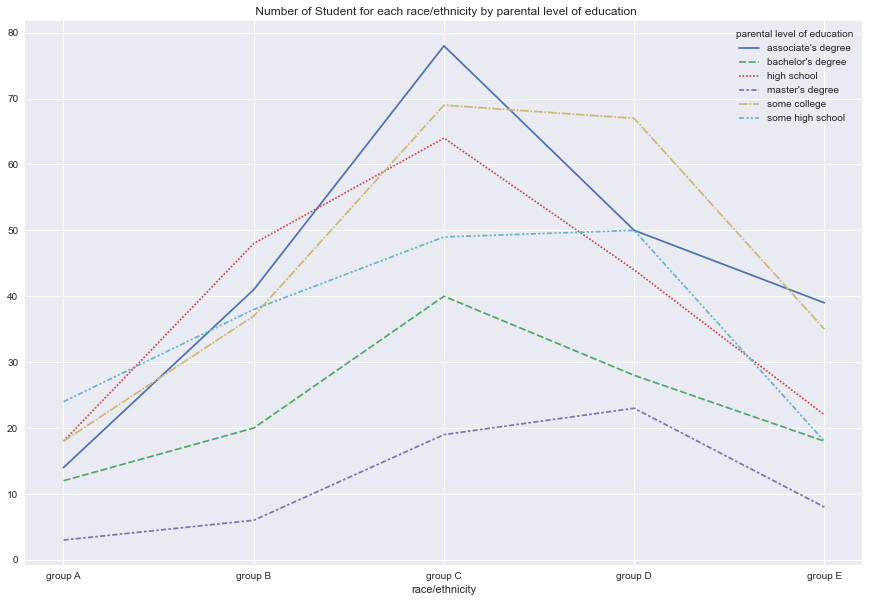

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df3)
plt.title(" Number of Student for each race/ethnicity by parental level of education");

### Summary plot 5 >> line plot 

 Number of Student for each race/ethnicity by parental level of education
 
parental level of education -->

associate's degree, bachelor's degree ,high school ,master's degree , some college ,some high school

race/ethnicity --> Group A , Group B , Group C , Group D , Group E

__________________________________________________________________________________________________________________________


associate's degree --> Group A- 14 / Group B- 41 / Group C- 48  / Group D- 50 / Group E- 39

bachelor's degree --> Group A- 12 / Group B- 20 / Group C- 40 / Group D- 28  / Group E- 18

high school --> Group A- 18 / Group B- 48 /  Group C- 64 / Group D- 44  / Group E- 22

master's degree --> Group A- 3 / Group B- 6  / Group C- 19  / Group D- 23  / Group E- 8

some college -->Group A- 18 / Group B- 37 / Group C- 96 / Group D- 67  / Group E- 35

some high school -->Group A- 24 / Group B- 38 / Group C- 49 / Group D- 50 / Group E- 18
______________________________________________________________________________________________________________________________

## Plot 6

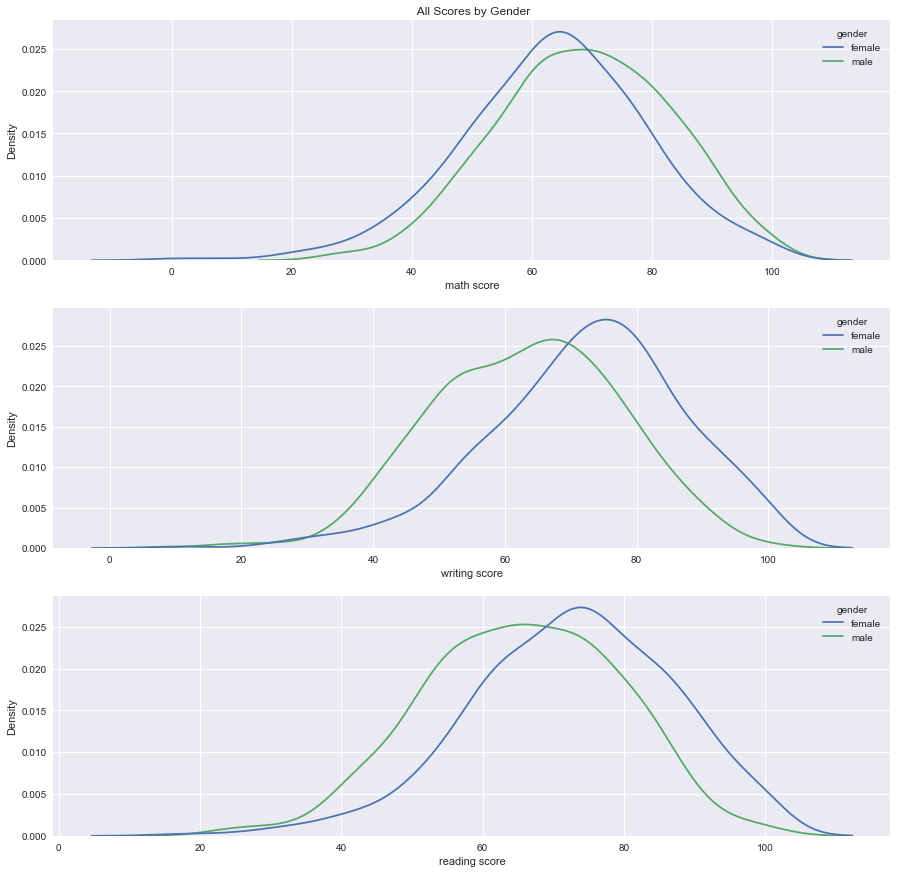

In [26]:
plt.figure(figsize=(15,15))

plt.subplot(3, 1, 1)
plt.title(" All Scores by Gender", loc="center")

sns.kdeplot(data=df, x="math score", hue="gender", common_norm=False)



plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x="writing score", hue="gender", common_norm=False)


plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x="reading score", hue="gender", common_norm=False)

#plt.tight_layout()
plt.show()


### summary plot 6 >> KDEPlot

All Scores by Gender
3 plots for scores by gender of students
________________________________________________________________________________________________________________________________

Plot 1 --> Math Score for gender of students (Male / Female)

Plot 2 --> Reading Score for gender of students (Male / Female)

Plot 3 --> Writing Score for gender of students (Male / Female)

________________________________________________________________________________________________________________________________

# Subplot with 4 plots using the 6 plots 

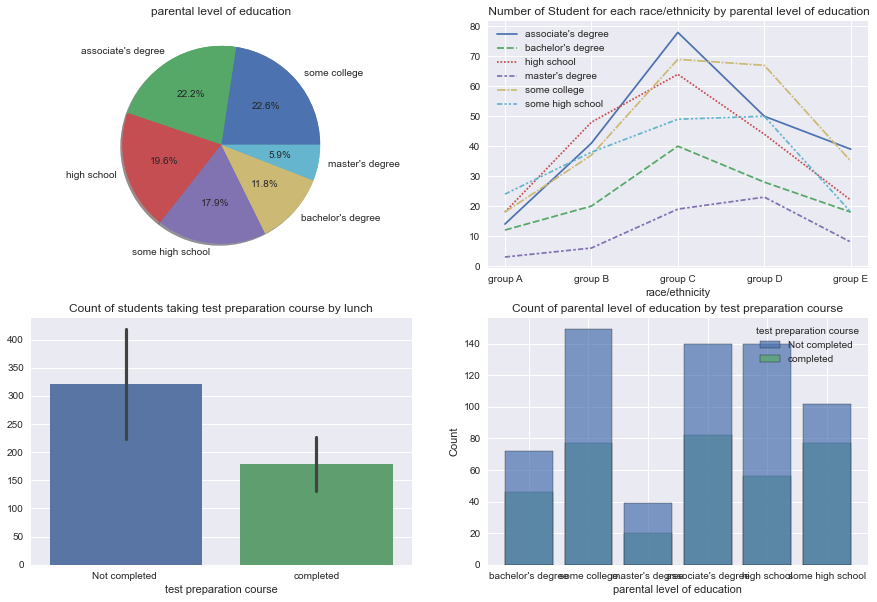

In [27]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
plt.pie(values) 
plt.title("parental level of education")
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%')


plt.subplot(2, 2, 2)
sns.lineplot(data=df3)
plt.legend(loc='upper left')
plt.title(" Number of Student for each race/ethnicity by parental level of education");


plt.subplot(2, 2, 3)
sns.barplot(data=df4)
plt.title("Count of students taking test preparation course by lunch");


plt.subplot(2, 2, 4)
sns.histplot(df,
    x="parental level of education",       
    hue="test preparation course",
    alpha=0.7,
    shrink=.8
)
plt.title("Count of parental level of education by test preparation course");


___________________________________________________________________________________________________________________________
# Summary

### A written explanation of your findings to help your end-user 

#### The dataset for (Students performance in exams and the marks secured by the students in various subjects)

#### This dataset containt1000 rows and  8 columns (gender, race/ethnicity, parental level of education,  lunch, test preparation course, math score, reading score, writing score).

1- Replaced value (none) to (Not completed) in column test preparation course (none = 642 and completed = 358).

2- Using a Subplot with 4 plots using the 6 plots to show the details of the dataset.

a) Plot_1:  A Pie Chart for the parental level of education.

b)  Plot_2: Using the following functions:

- groupby() for gender and parental level of education.

- count() for math score.

- unstack() for the parental level of education.

c)  Plot_3: Histogram for Count of parental level of education by test preparation course.

d)  Plot_4: The barplot for Count of students taking test preparation course by lunch.

e) Plot_5: The lineplot for the Number of Students for each race/ethnicity by the parental level of education.

f) Plot_6: The kdeplot for All Scores by Gender.

3- Finally; Subplot with 4 plots using the 6 plots.

____________________________________________________________________________________________________________________________

https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv